# OBESITY LEVELS PREDICTION USING MACHINE LEARNING AND DEEP LEARNING METHODS
# TEAM 1

In [13]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING NECESSARY LIBRARIES AND MODELS

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#DATASET EXPLORATION AND VISUALISATION

In [14]:

train=pd.read_csv("/content/drive/MyDrive/Data/train.csv/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Data/test.csv/test.csv")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [20]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [22]:
train=train.drop_duplicates()

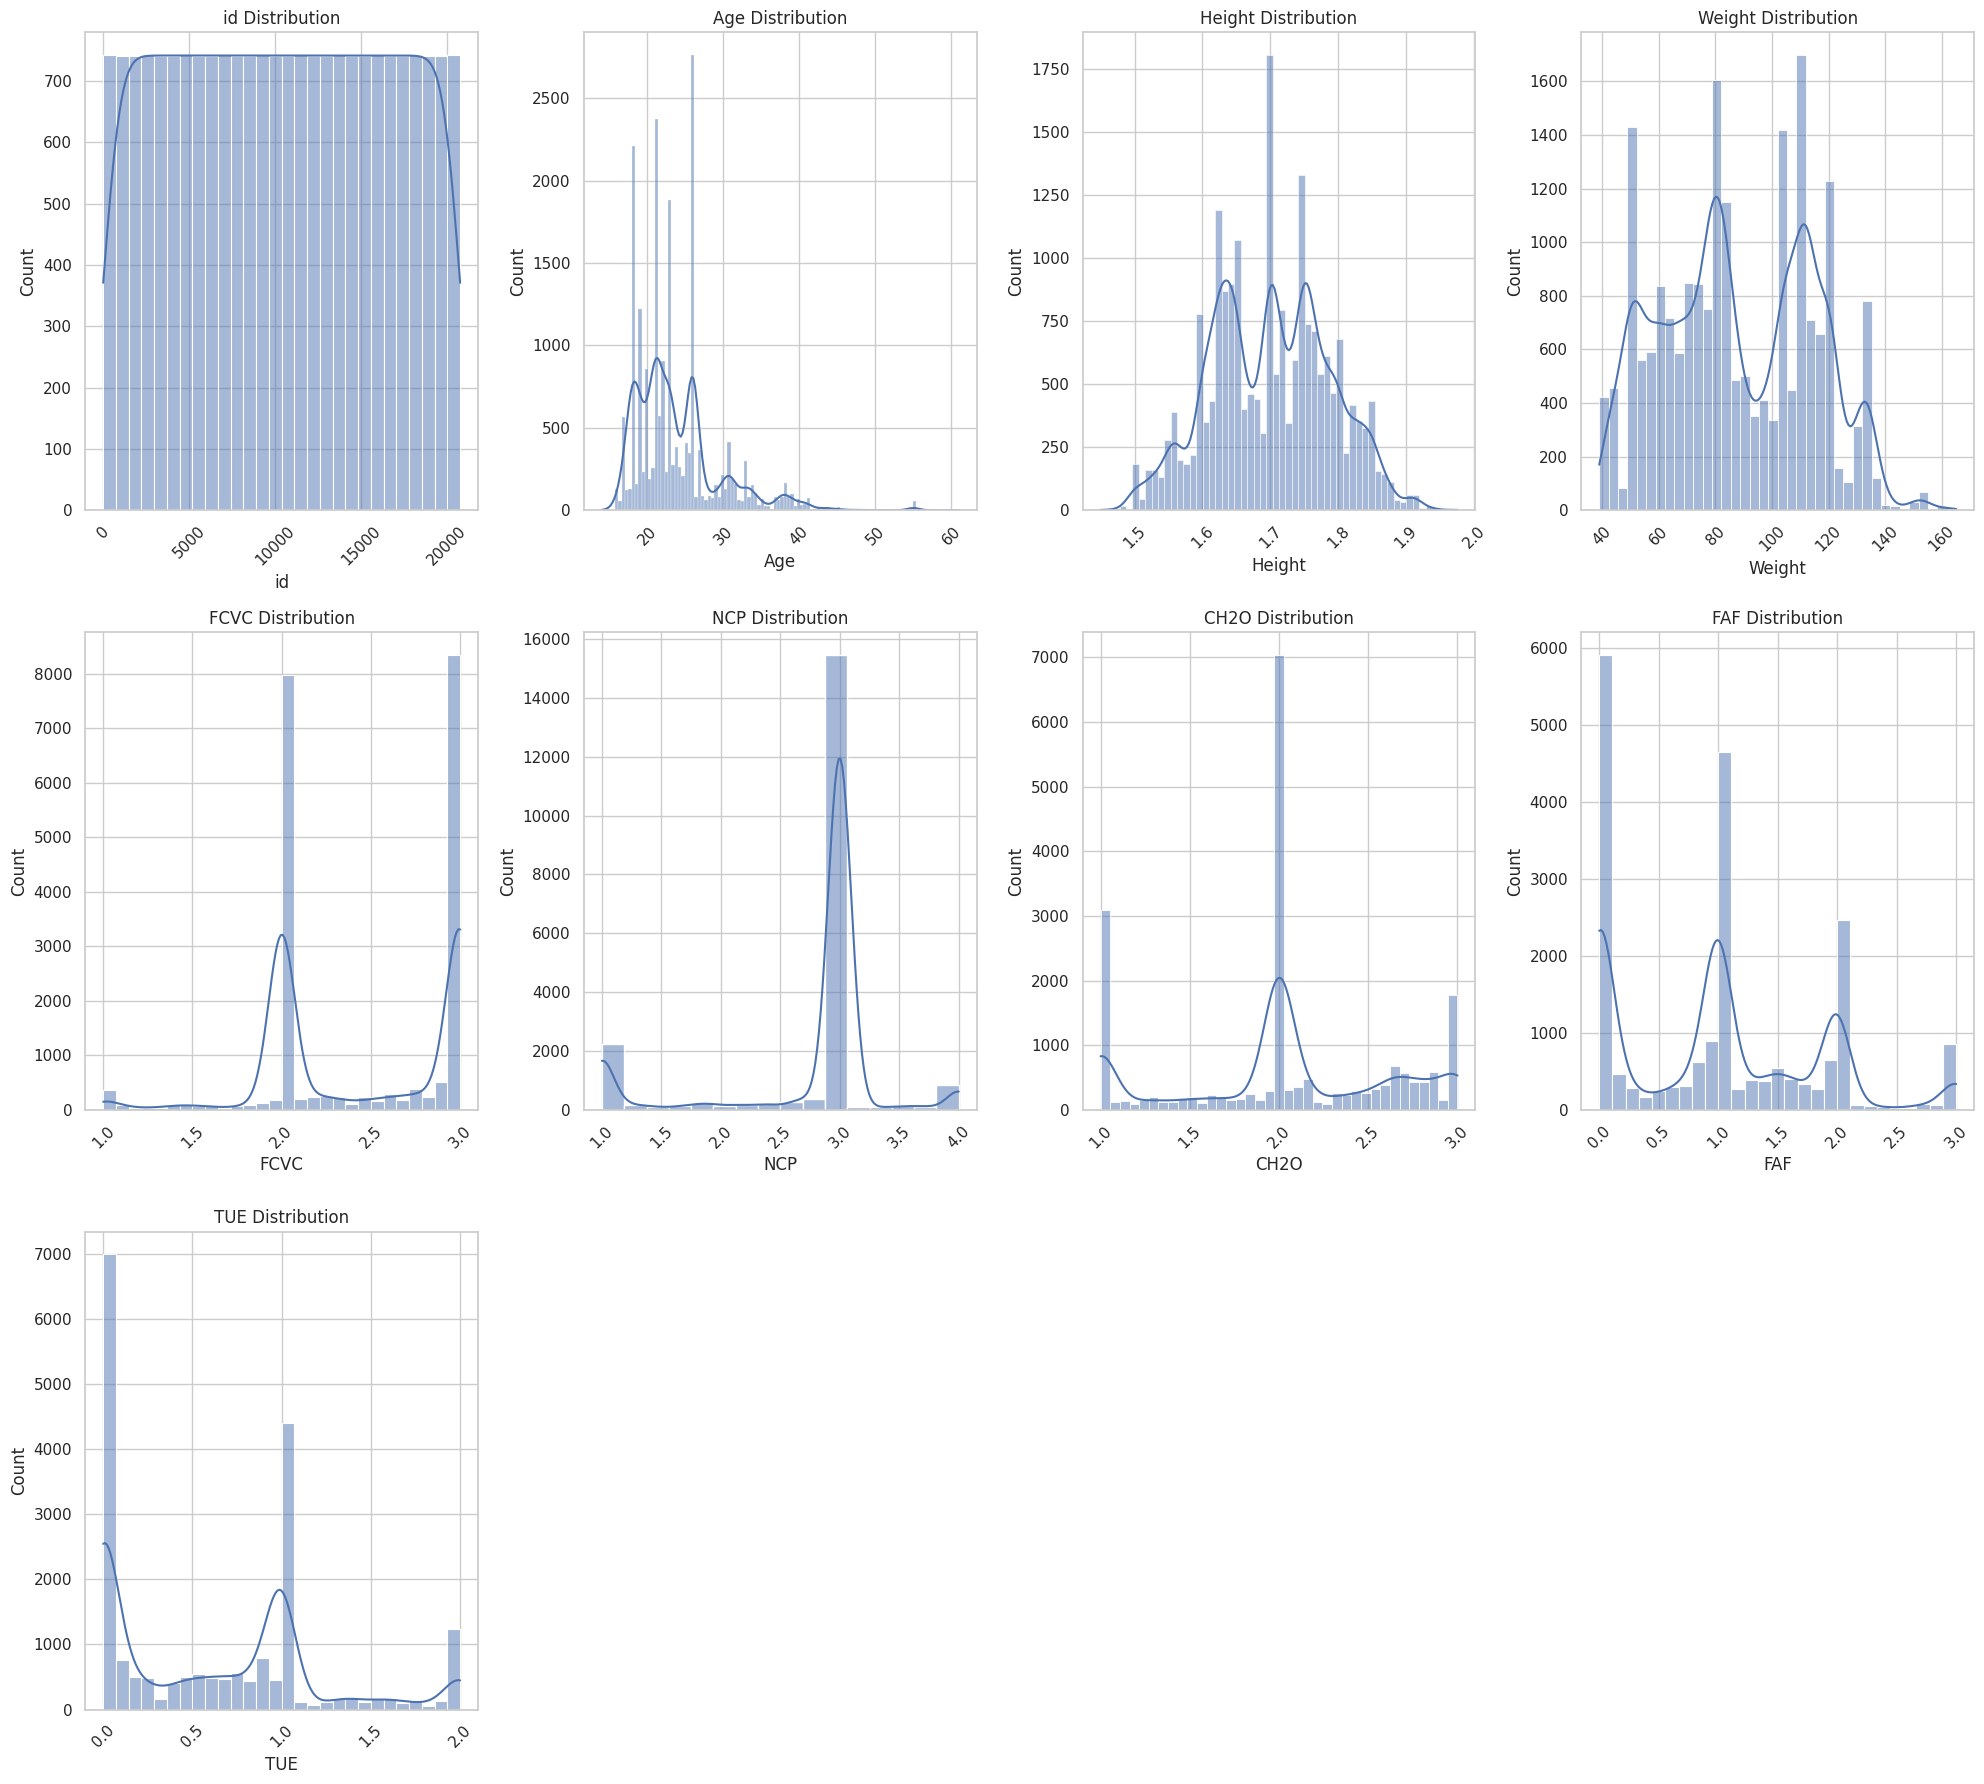

In [23]:
#numerical data visualisation
sns.set(style="whitegrid")
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

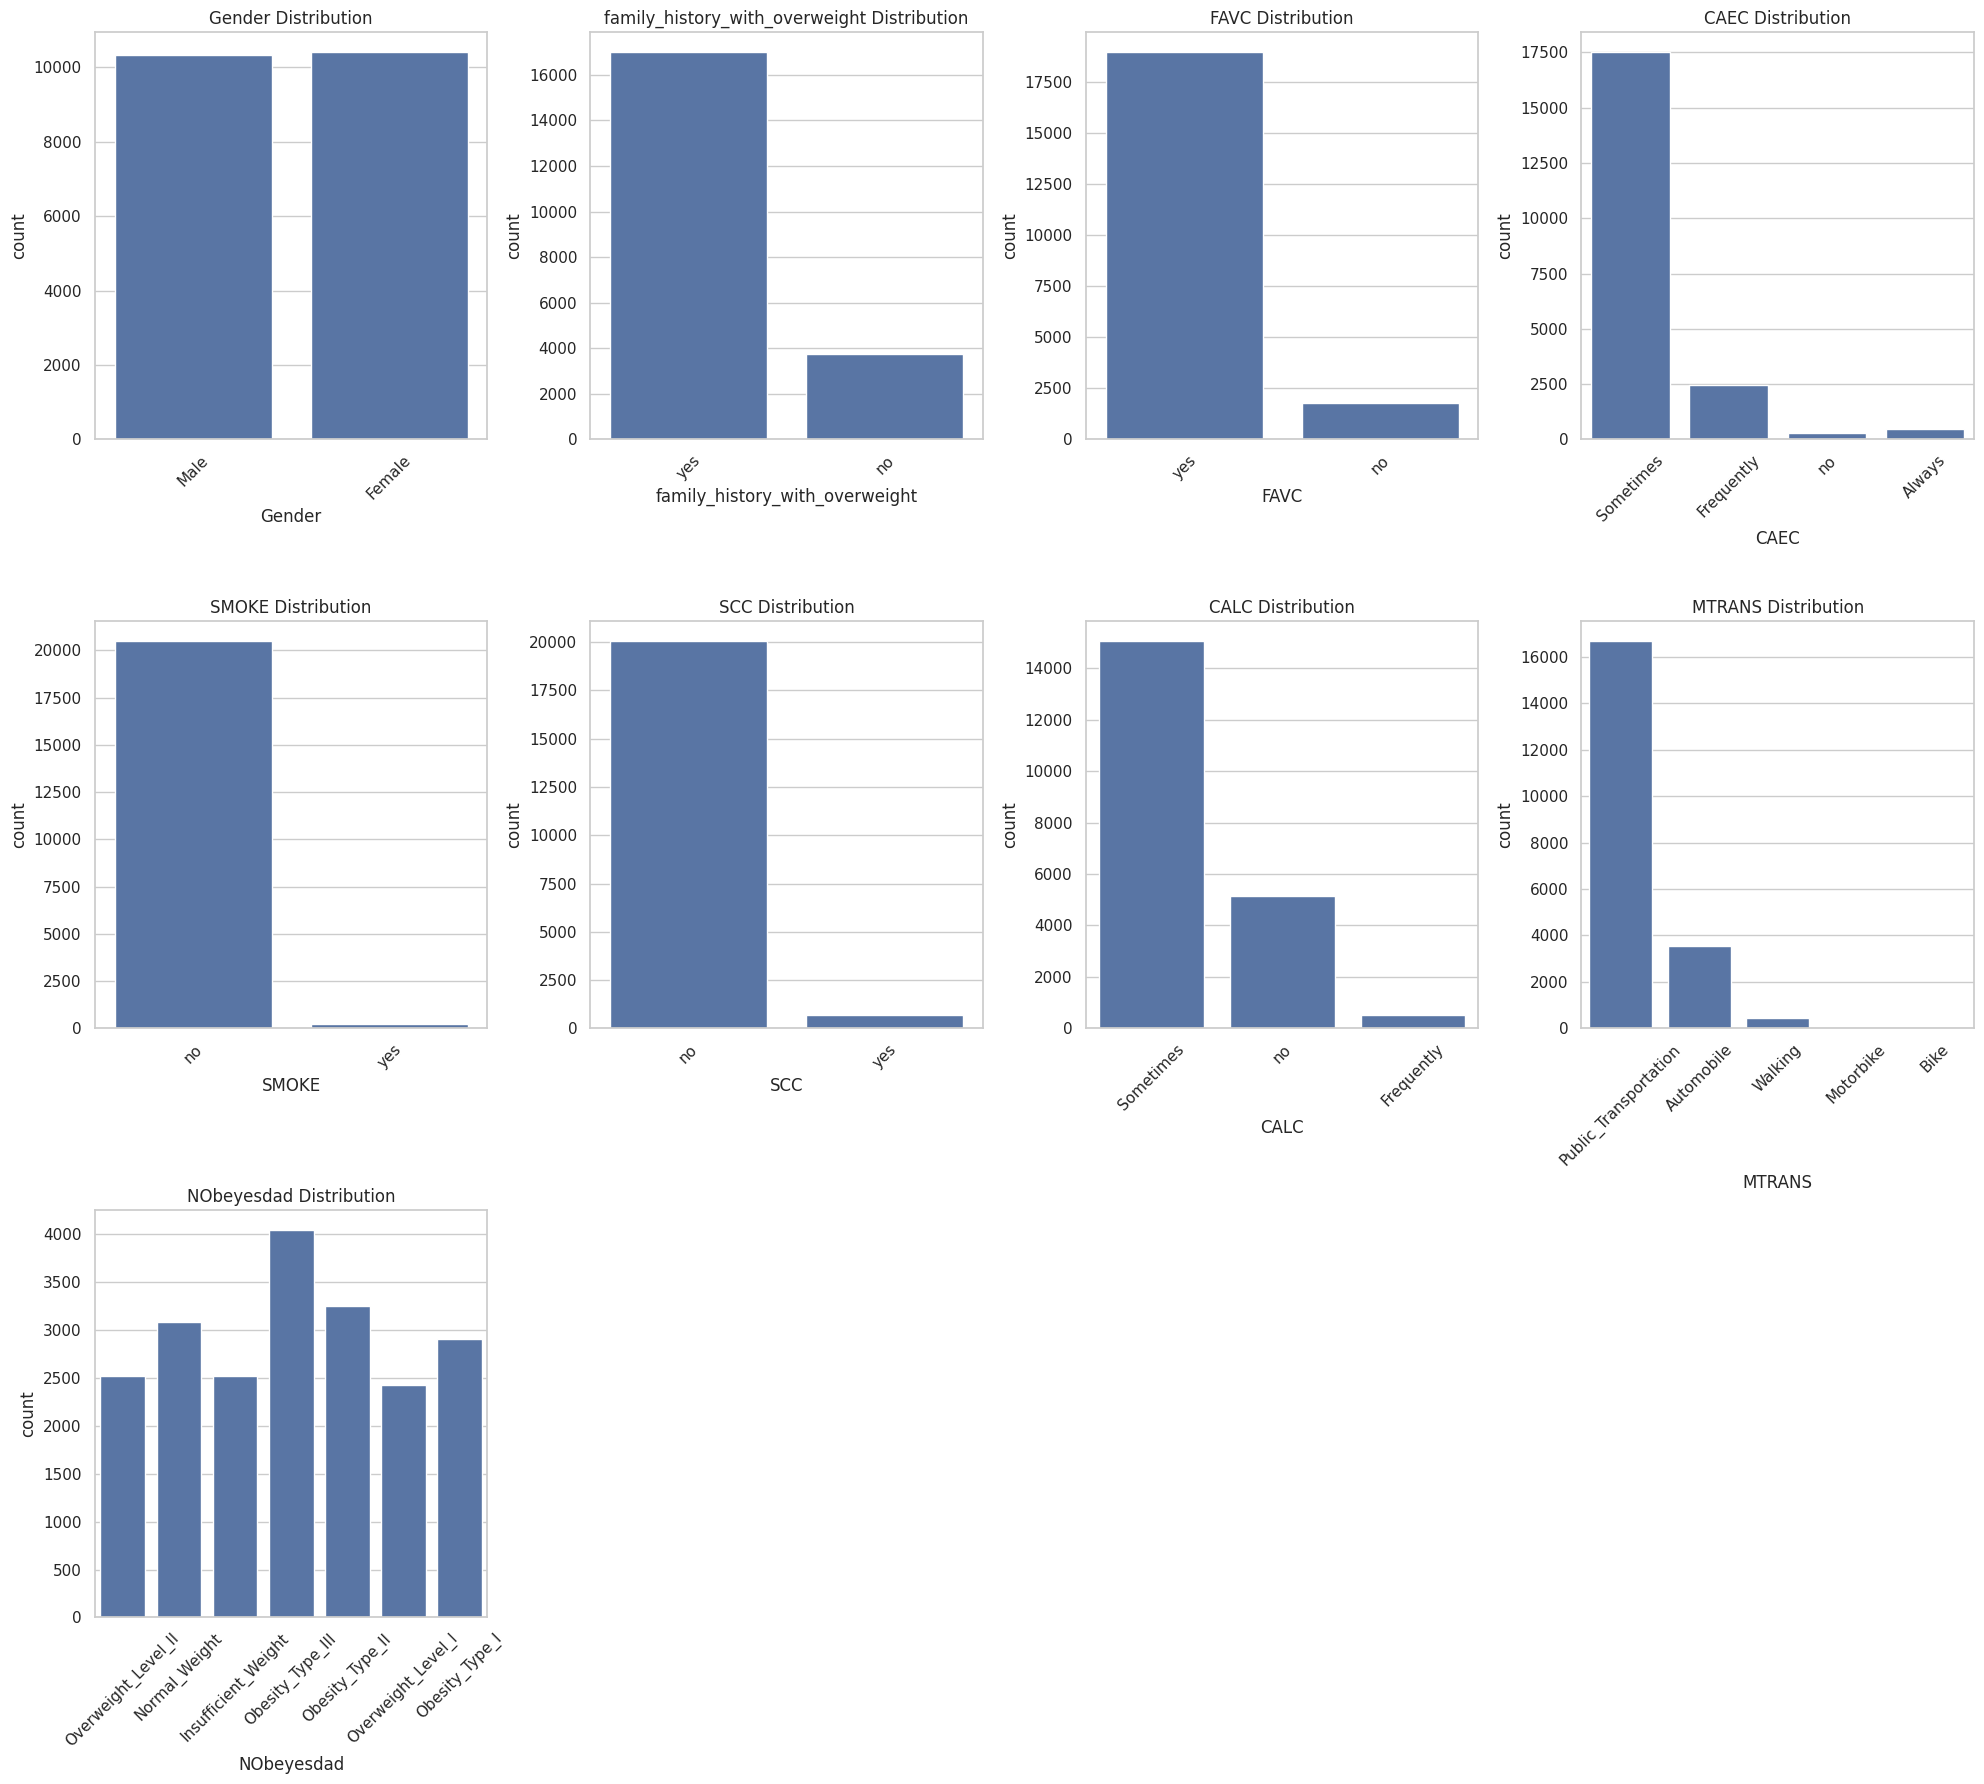

In [24]:
#categorical data visualisation
num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sns.countplot(x= col, data=train)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DATA PRE-PROCESSING

In [25]:
#converting binary categorical data into numerical data (0/1)
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(train,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)

#converting muli-valued attribute data into numerical data by one-hot enconding
le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [26]:
#Power Tranformer to normalise the features to enhance the model's performance
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

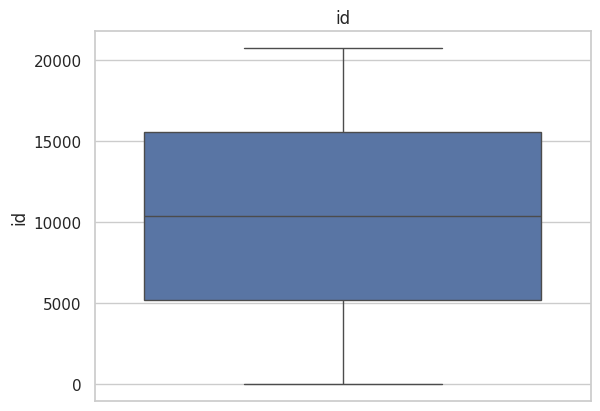

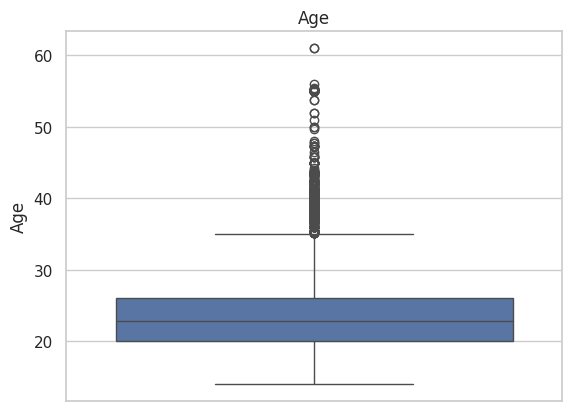

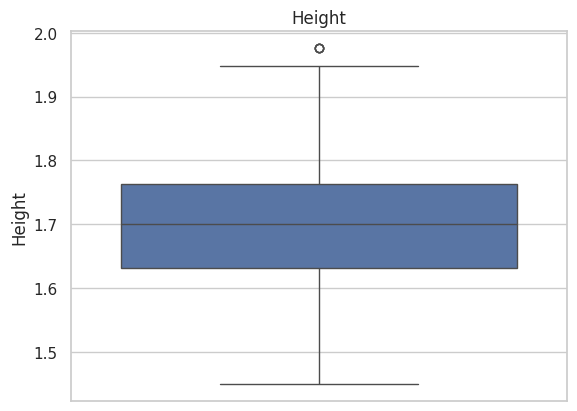

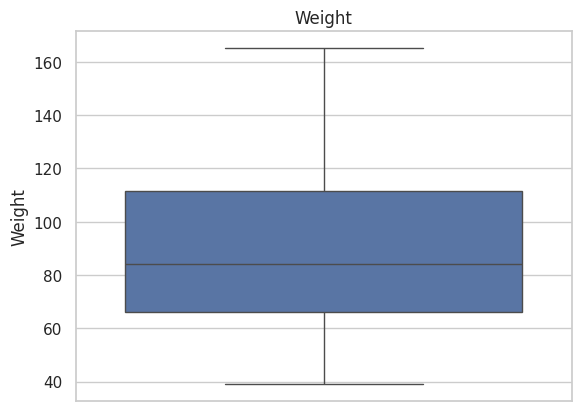

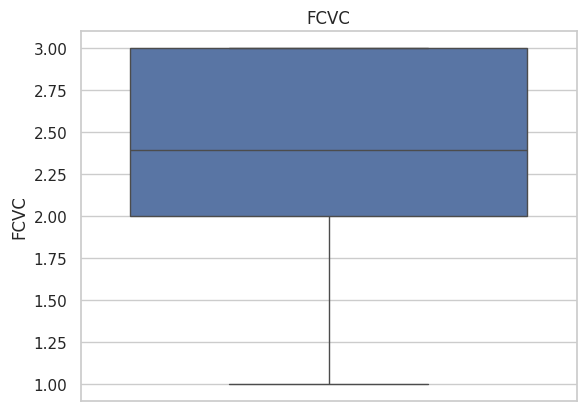

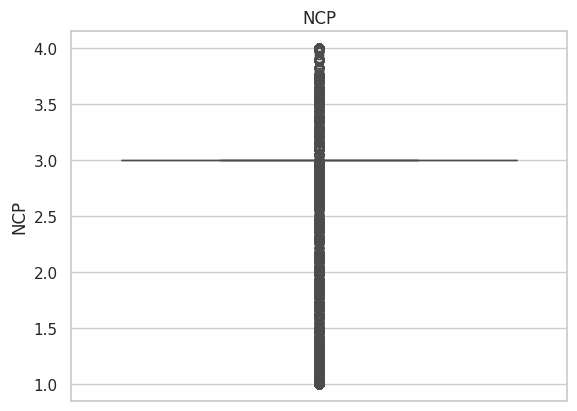

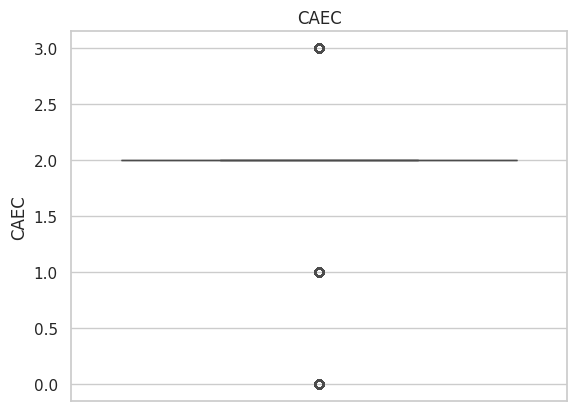

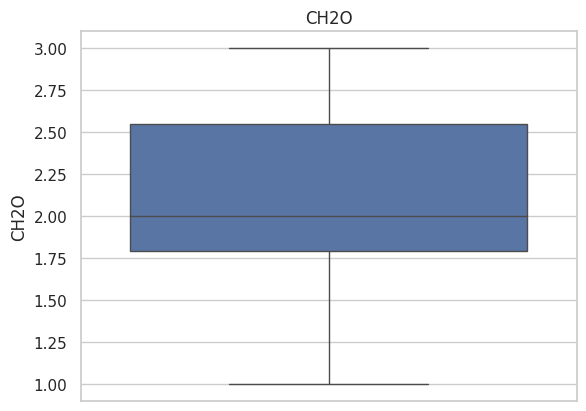

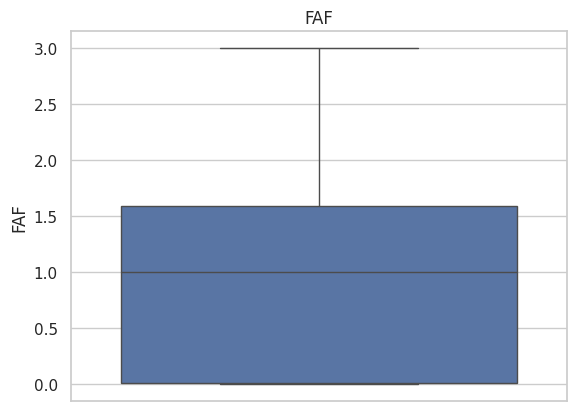

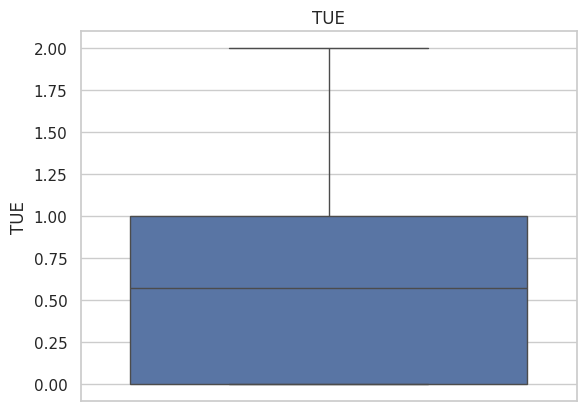

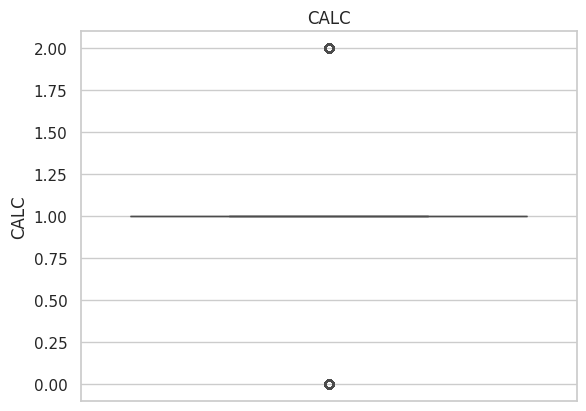

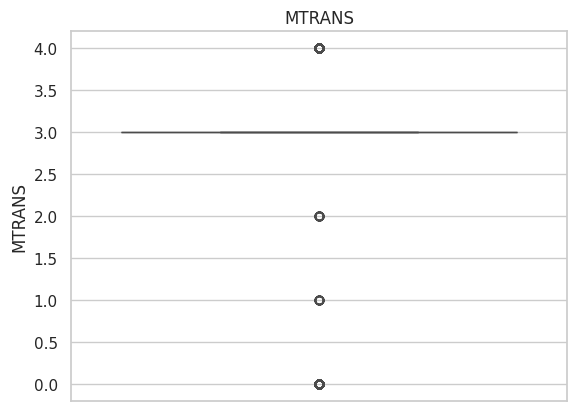

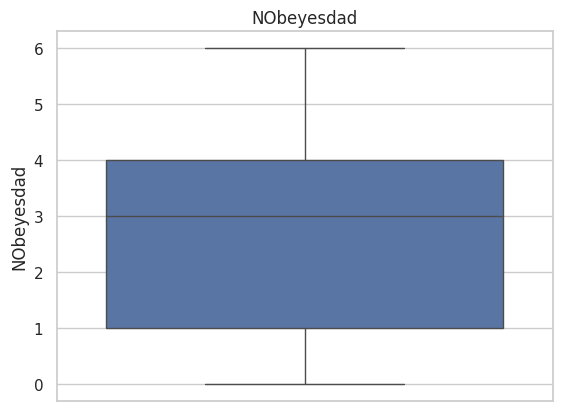

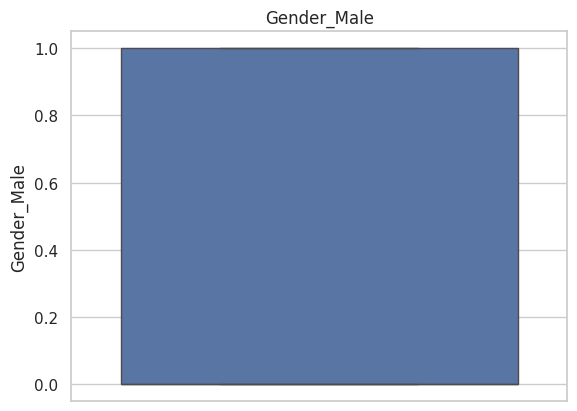

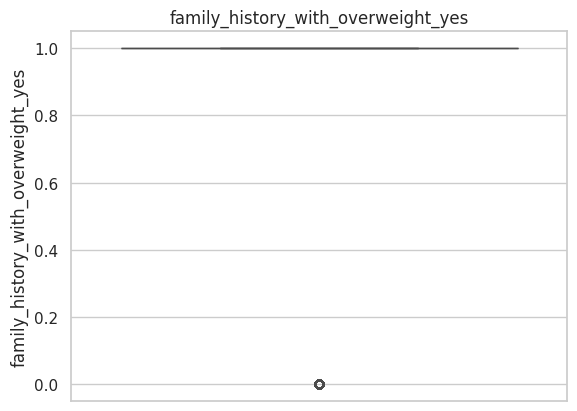

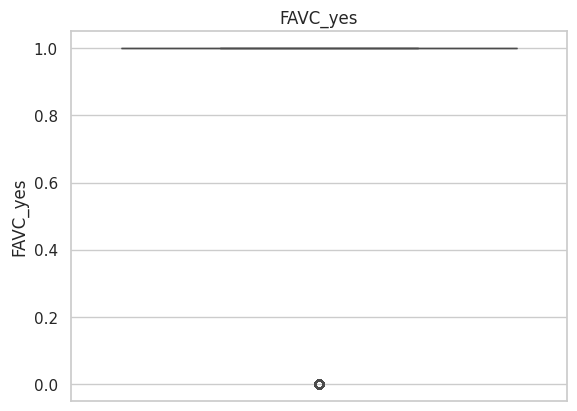

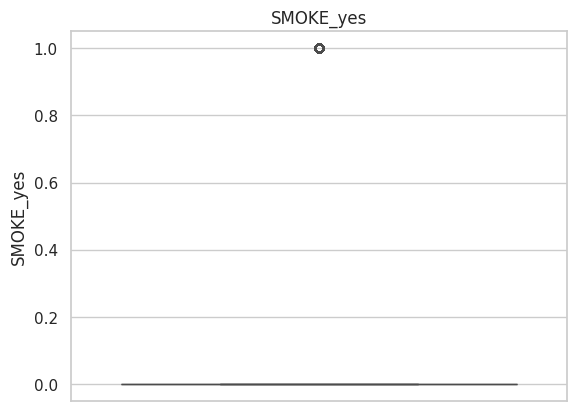

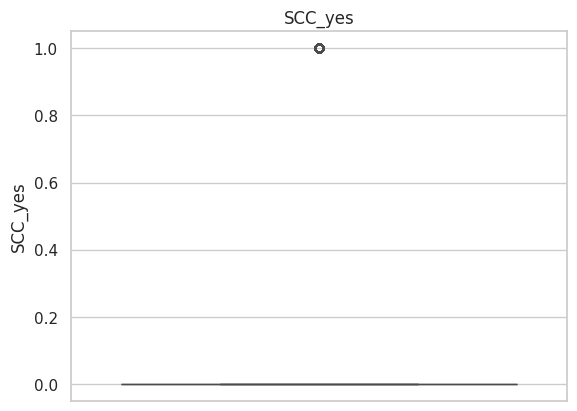

In [27]:
#checking for outliers in training dataset
for i in train.columns:
    sns.boxplot(train[i])
    plt.title(i)
    plt.show()

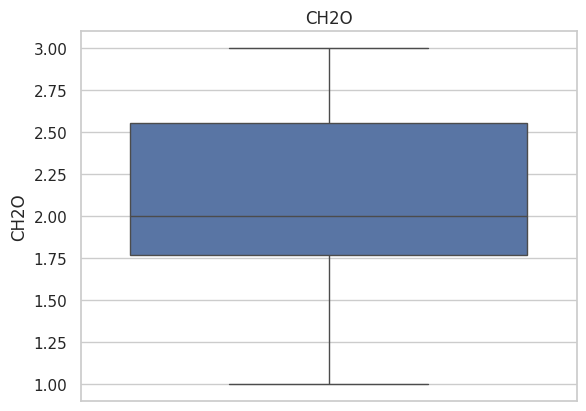

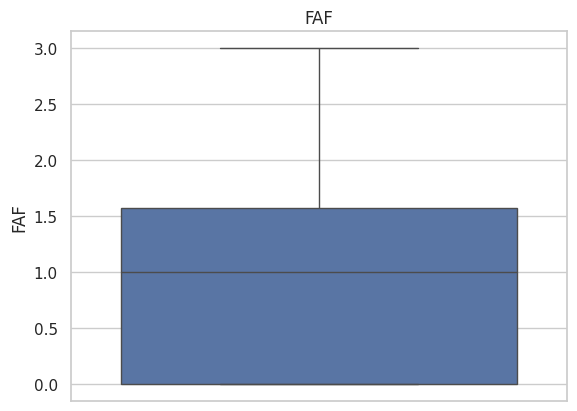

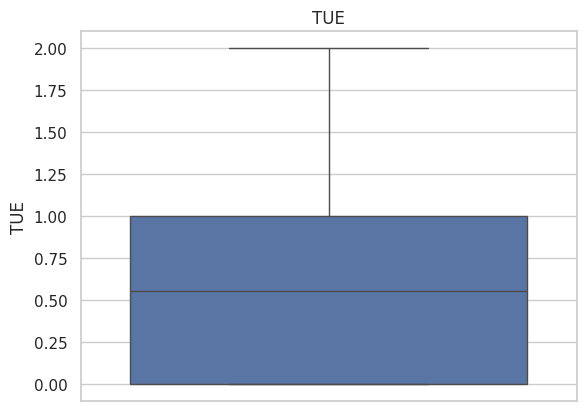

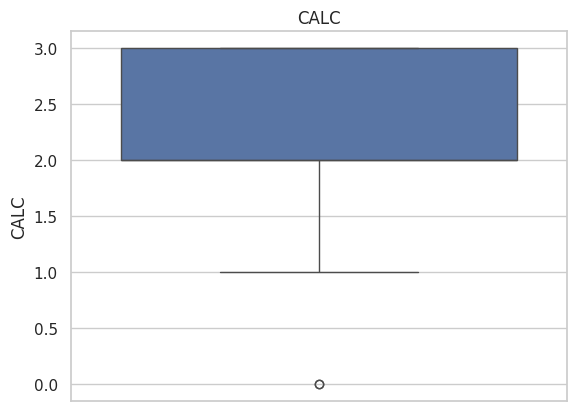

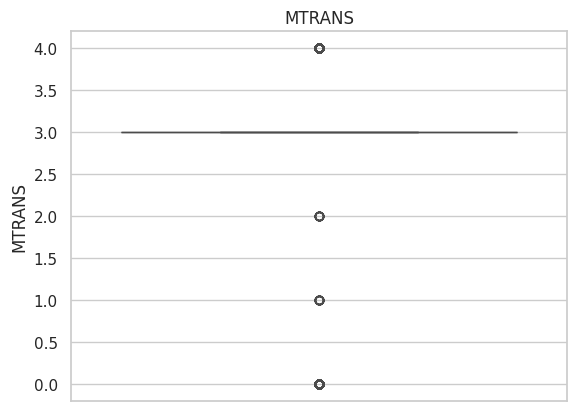

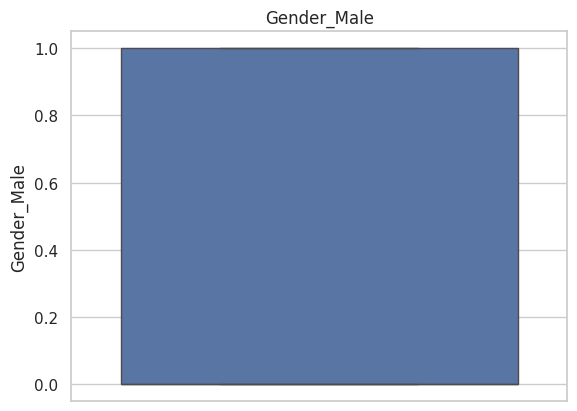

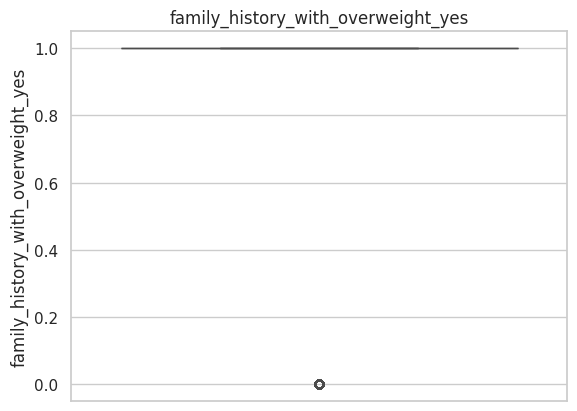

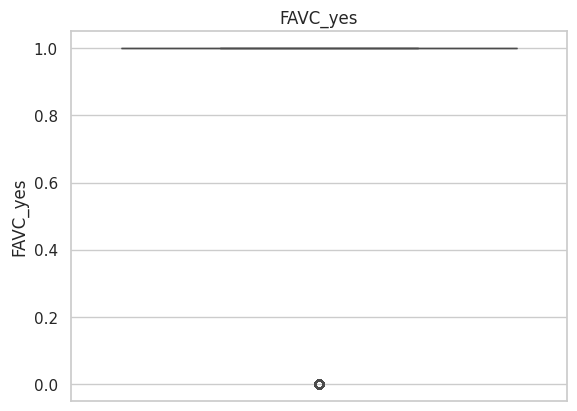

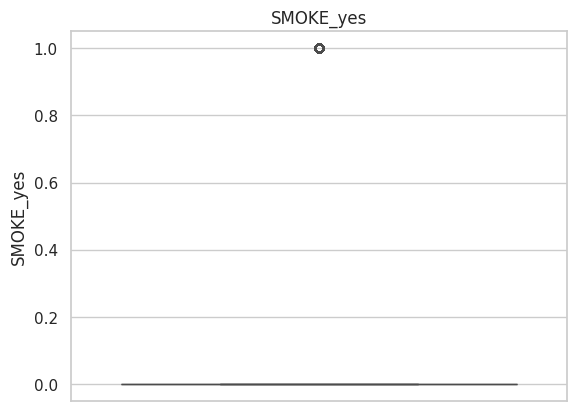

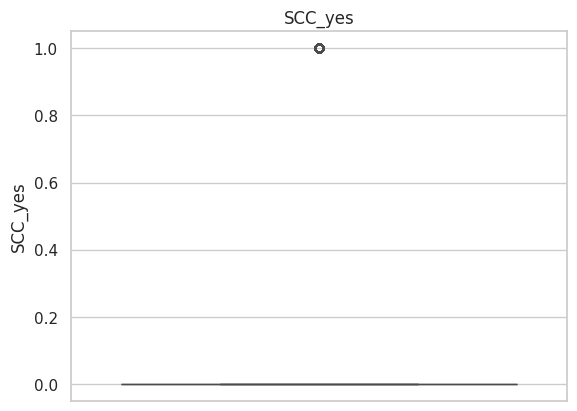

In [28]:
#checking for outliers in testing dataset
for i in test.columns:
    sns.boxplot(test[i])
    plt.title(i)
    plt.show()

In [29]:
#block of code to remove outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [30]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

# SPLITTING UP OF THE DATA INTO TRAINING VALIDATION AND TESTING

In [31]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

#Final split => train-val-testing => 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) #80-20
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #20 => 10-10

# RANDOM FOREST MODEL TRAINING AND EVALUATION

In [32]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                            criterion='gini', bootstrap=True, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9666203059805285
Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.87      0.93      0.90        42
           2       0.88      0.93      0.90        56
           3       1.00      0.98      0.99       116
           4       1.00      1.00      1.00       426
           5       0.79      0.85      0.82        40
           6       0.94      0.65      0.77        26

    accuracy                           0.97       719
   macro avg       0.92      0.91      0.91       719
weighted avg       0.97      0.97      0.97       719



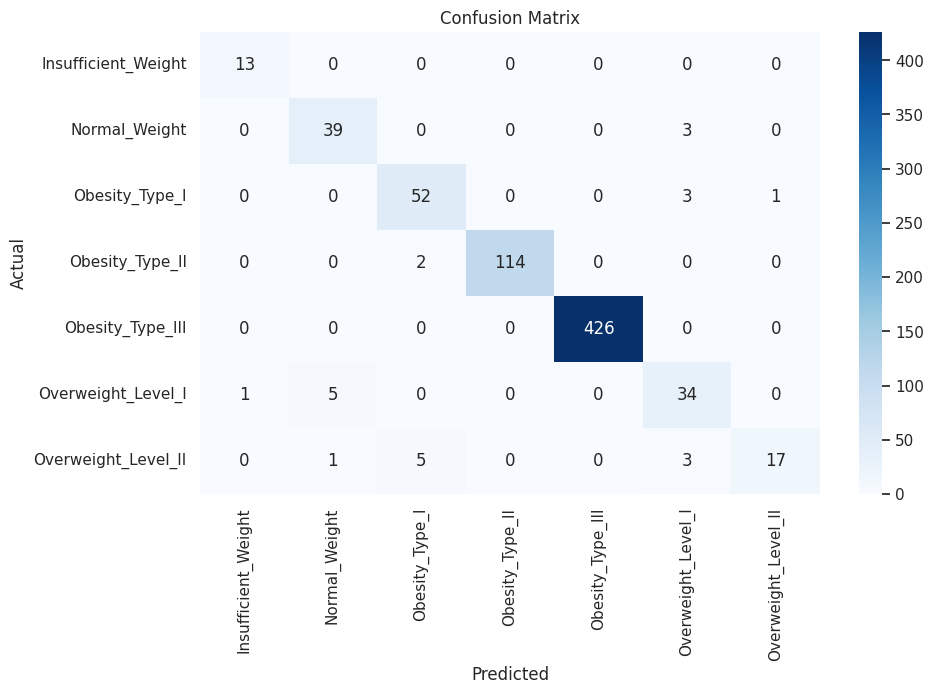

In [34]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#saving the RF model
import joblib
joblib.dump(rf, '/content/drive/MyDrive/random_forest_model.pkl')

['/content/drive/MyDrive/random_forest_model.pkl']

# XGBOOST MODEL TRAINING AND EVALUATION

In [37]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9735744089012517
Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.95      0.95      0.95        42
           2       0.94      0.89      0.92        56
           3       0.98      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.83      0.88      0.85        40
           6       0.85      0.85      0.85        26

    accuracy                           0.97       719
   macro avg       0.93      0.94      0.93       719
weighted avg       0.97      0.97      0.97       719



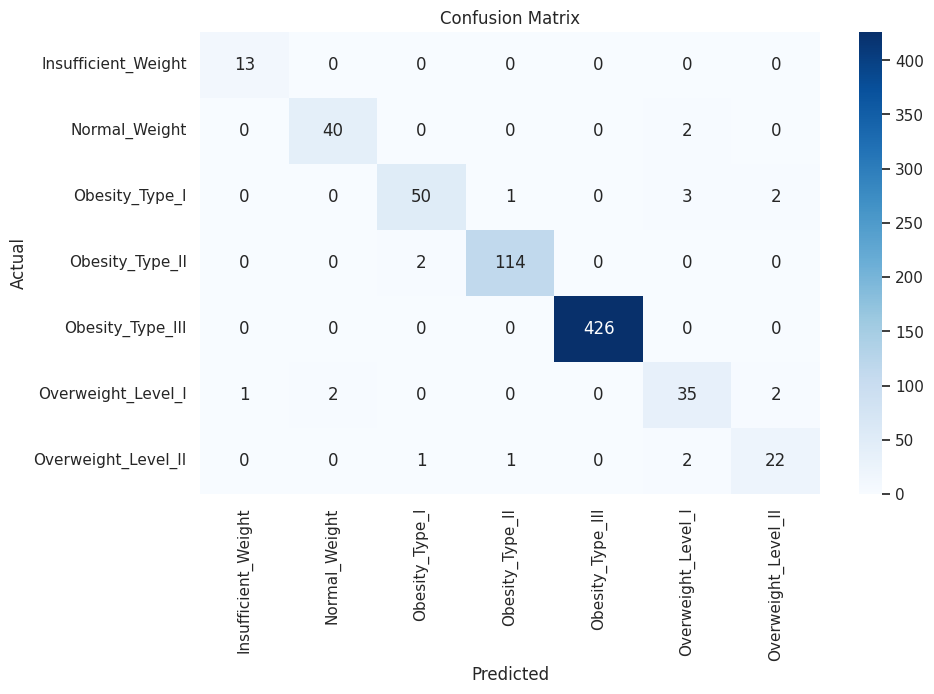

In [39]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
#saving the XGBOOST model
joblib.dump(xgb, '/content/drive/MyDrive/xgboost_model.pkl')

['/content/drive/MyDrive/xgboost_model.pkl']

# TESTING THE MODELS

In [41]:
test_features = test.drop('NObeyesdad', axis=1, errors='ignore')
test_features_scaled = pt.transform(test_features)

test_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
# Create the ANN model
ann = Sequential()
# Input layer with the number of features in X_train and first hidden layer
ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
# Additional hidden layers
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=16, activation='relu'))
# Output layer for multi-class classification
ann.add(Dense(units=len(le.classes_), activation='softmax'))

# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Train the model
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5646 - loss: 1.2376 - val_accuracy: 0.8460 - val_loss: 0.4505
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.4577 - val_accuracy: 0.8799 - val_loss: 0.2996
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.3196 - val_accuracy: 0.9034 - val_loss: 0.2363
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2399 - val_accuracy: 0.9234 - val_loss: 0.2004
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1939 - val_accuracy: 0.9286 - val_loss: 0.1950
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9392 - loss: 0.1941 - val_accuracy: 0.9339 - val_loss: 0.1658
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1697 - val_accuracy: 0.9365 - val_loss: 0.1613
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - loss: 0.1676 - val_accuracy: 0.

In [45]:
# Predict on test set
y_pred = ann.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Evaluate accuracy
print('Accuracy:', accuracy_score(y_test, y_pred_classes))
print('Classification Report:', classification_report(y_test, y_pred_classes))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.9443671766342142
Classification Report:               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.81      0.83      0.82        42
           2       0.82      0.88      0.84        56
           3       0.99      0.97      0.98       116
           4       1.00      1.00      1.00       426
           5       0.69      0.72      0.71        40
           6       0.78      0.54      0.64        26

    accuracy                           0.94       719
   macro avg       0.84      0.85      0.84       719
weighted avg       0.94      0.94      0.94       719



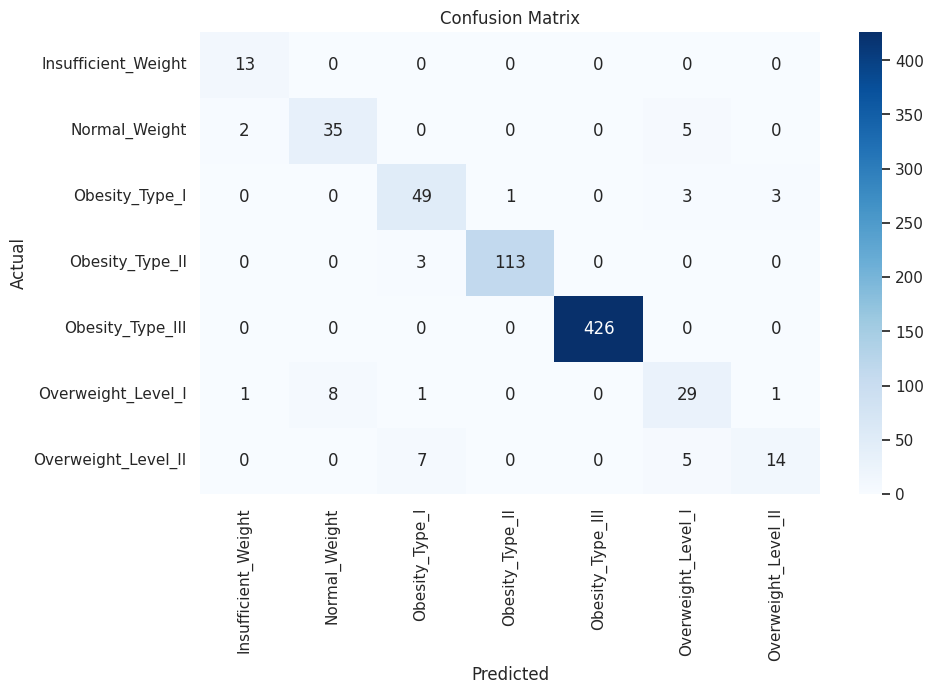

In [46]:
# Plot confusion matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:
# Save the ANN model in the recommended Keras format
ann.save('/content/drive/MyDrive/ann_model.keras')
